In [31]:
import numpy as np
import pynbody
import matplotlib.pylab as plt
from scipy.interpolate import griddata
from colossus.cosmology import cosmology
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config InlineBackend.rc = {'figure.facecolor': 'w'}

###

sim_colors = {}

sim_colors['cdm'] = 'k'

sim_colors['wdm_3'] = "#FF9966"
sim_colors['wdm_4'] = "#FF5500"
sim_colors['wdm_6'] = "#993300"

sim_colors['bump_cutoff_wdm_3'] = "#c8adff"
sim_colors['bump_cutoff_wdm_4'] = "#7733ff"
sim_colors['bump_cutoff_wdm_6'] = "#471e99"

sim_colors['bump_wdm_3'] = "#adbbff"
sim_colors['bump_wdm_4'] = "#3355ff"
sim_colors['bump_wdm_6'] = "#1e3399"

sim_colors['cutoff_wdm_3'] = "#ffadbb"
sim_colors['cutoff_wdm_4'] = "#ff3355"
sim_colors['cutoff_wdm_6'] = "#991e33"

###

plt.rc("text", usetex=True)
plt.rcParams["axes.linewidth"]  = 1.5
plt.rcParams["xtick.major.size"]  = 8
plt.rcParams["xtick.minor.size"]  = 3
plt.rcParams["ytick.major.size"]  = 8
plt.rcParams["ytick.minor.size"]  = 3
plt.rcParams["xtick.direction"]  = "out"
plt.rcParams["ytick.direction"]  = "out"
plt.rcParams["legend.frameon"] = 'False'

In [32]:
Tk_cdm = np.loadtxt('../Data/transfer_cdm_z99.dat')
k = np.linspace(np.min(Tk_cdm[:,0]),np.max(Tk_cdm[:,0]),10000)

###

h = 0.7; omega_mh2 = 0.11711; a = 0.0437; b = -1.188; nu = 1.049; theta = 2.012; eta = 0.2463
params = {'flat': True, 'H0': 70.0, 'Om0': 0.286, 'Ob0': 0.049, 'sigma8': 0.82, 'ns': 0.96}
cosmology.addCosmology('myCosmo', params)
cosmo = cosmology.setCosmology('myCosmo')
rho_m = cosmo.rho_m(0.)*1e9*(h**2) #Msun/Mpc^3

###

def M_k(k):
    return 4*np.pi*rho_m*((np.pi/k)**3)/3.

def k_M(M):
    return (3.*M/(4*np.pi*rho_m))**(-1./3.)*np.pi

def M_hm(m_wdm):
    return 4.3e8*(m_wdm/3.)**-3.564

###

def transfer_wdm(k,mwdm):
    alpha = a*(mwdm**b)*((omega_mh2/0.12)**eta)*((h/0.6736)**theta)
    transfer = (1+(alpha*k)**(2*nu))**(-5./nu)
    return transfer

def transfer_bump(k,k0,A=2,sigma_k=0.5):
    return 1.+A*np.exp(-1.*((np.log(k)-np.log(k0))**2)/sigma_k**2)

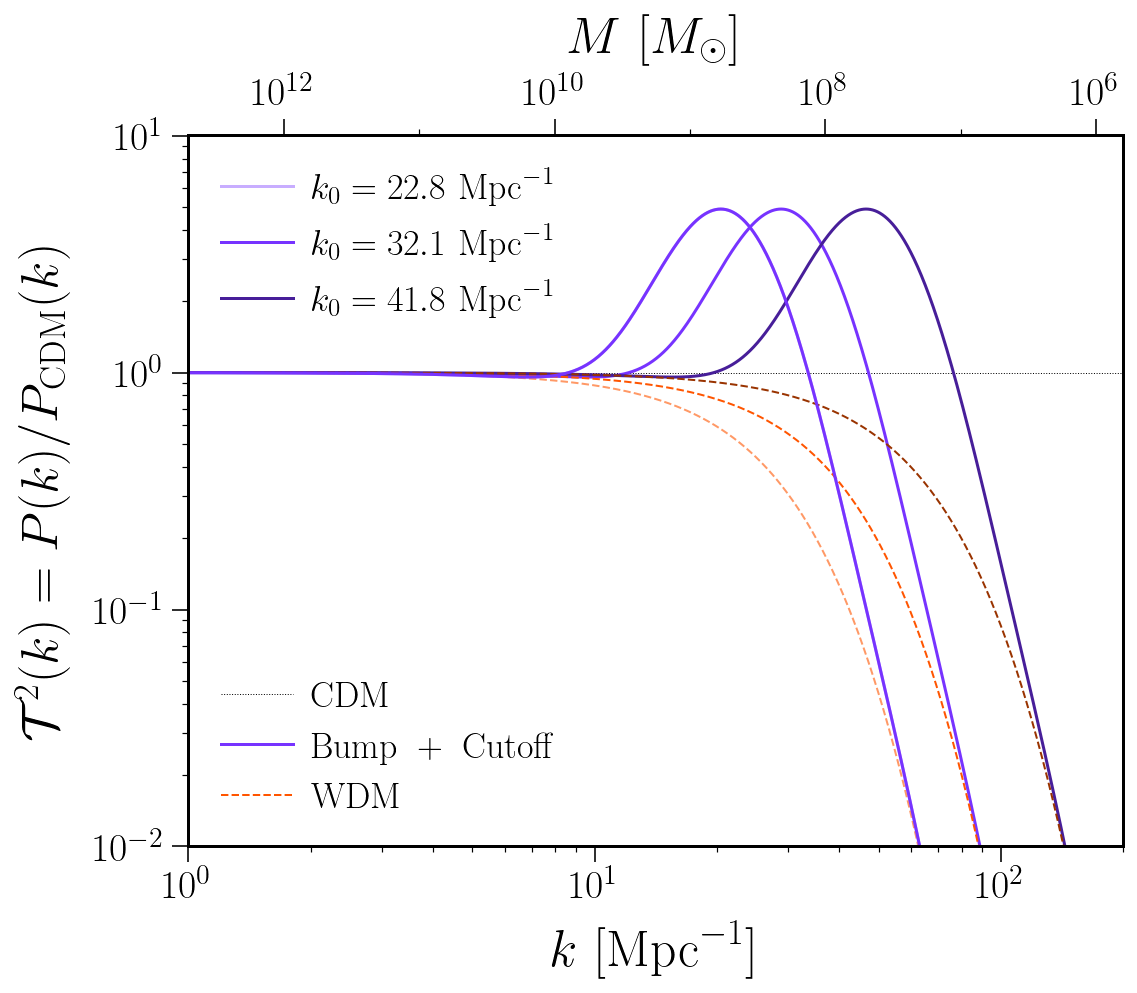

In [38]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)
ax2 = ax.twiny()

###

cdm = ax.semilogx(Tk_cdm[:,0]*h,Tk_cdm[:,1]/Tk_cdm[:,1],
            c='k',ls=':',lw=0.5,label=r'$\mathrm{CDM}$')

###

bump_cutoffs = []
labels = [r'$k_0=22.8~\mathrm{Mpc}^{-1}$',r'$k_0=32.1~\mathrm{Mpc}^{-1}$',r'$k_0=41.8~\mathrm{Mpc}^{-1}$']

for i,m_wdm in enumerate([3,4,6]):
    bump_cutoffs.append(ax.loglog(k*h,transfer_bump(k*h,k_M(M_hm(m_wdm)))**2*transfer_wdm(k*h,m_wdm)**2,
             c=sim_colors['bump_cutoff_wdm_{}'.format(m_wdm)],lw=1.5,label=labels[i]))
    ax.loglog(k*h,transfer_wdm(k*h, m_wdm)**2,
              c=sim_colors['wdm_{}'.format(m_wdm)],ls='--',lw=1)

###

m_wdm = 3
bump_cutoff = ax.loglog(k*h,transfer_bump(k*h,k_M(M_hm(m_wdm)))**2*transfer_wdm(k*h, m_wdm)**2,
                        c="#7733ff",lw=1.5,label=r'$\mathrm{Bump\ +\ Cutoff}$')

m_wdm = 4
cutoff = ax.loglog(k*h,-1.*transfer_wdm(k*h, m_wdm)**2,
                   c=sim_colors['wdm_4'],ls='--',lw=1,label=r'$\mathrm{WDM}$')

###

first_legend = plt.legend(handles=[cdm[0],bump_cutoff[0],cutoff[0]], loc=3, prop={'size':18}, handletextpad=0.5)
plt.gca().add_artist(first_legend)
plt.legend(handles=[bump_cutoffs[0][0],bump_cutoffs[1][0],bump_cutoffs[2][0]], 
           loc=2, prop={'size':18},handletextpad=0.5)

ax.set_xlim(1,200)
ax.set_ylim(0.01,10.05)

ax.set_xticks([1,10,100])
ax.set_xticklabels([r'$10^0$',r'$10^1$',r'$10^2$'],fontsize=20)
ax.set_yticks([1e-2,1e-1,1e0,1e1])
ax.set_yticklabels([r'$10^{-2}$',r'$10^{-1}$',r'$10^{0}$',r'$10^{1}$'],fontsize=20)

ax2.set_xscale('log')
ax2.set_xlim(1,200)
ax2.set_xticks([k_M(1e12),k_M(1e10),k_M(1e8),k_M(1e6)])
ax2.set_xticklabels([r'$10^{12}$',r'$10^{10}$',r'$10^{8}$',r'$10^6$'],fontsize=20)
ax2.set_xticks([k_M(1e11),k_M(1e9),k_M(1e7)],minor=True)
ax2.set_xticklabels(['','',''],fontsize=17,minor=True)
ax2.set_xlabel(r'$M\ [M_{\mathrm{\odot}}]$',fontsize=26,labelpad=12)

ax.set_xlabel(r'$k\ [\mathrm{Mpc}^{-1}]$',fontsize=26,labelpad=8)
ax.set_ylabel(r'$\mathcal{T}^2(k) = P(k)/P_{\mathrm{CDM}}(k)$',fontsize=26,labelpad=12)

###

plt.tight_layout()
plt.show()

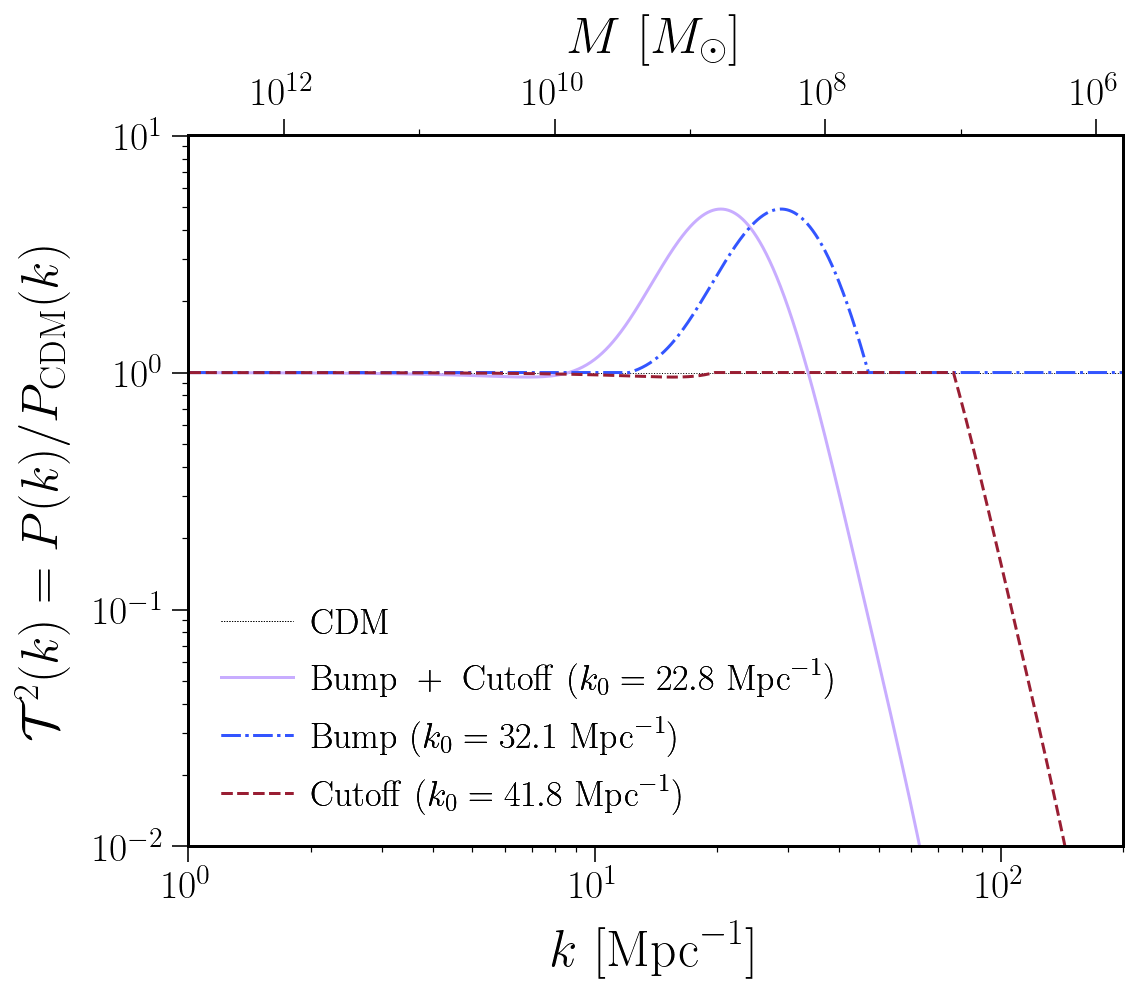

In [39]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)
ax2 = ax.twiny()

###

cdm = ax.semilogx(Tk_cdm[:,0]*h,Tk_cdm[:,1]/Tk_cdm[:,1],
            c='k',ls=':',lw=0.5,label=r'$\mathrm{CDM}$')

###

m_wdm = 3
bump_cutoff = ax.loglog(k*h,transfer_bump(k*h,k_M(M_hm(m_wdm)))**2*transfer_wdm(k*h, m_wdm)**2,
                        c=sim_colors['bump_cutoff_wdm_{}'.format(m_wdm)],lw=1.5,
                        label=r'$\mathrm{Bump\ +\ Cutoff}\ (k_0=22.8~\mathrm{Mpc}^{-1})$')

m_wdm = 4
bump = ax.loglog(k*h,(transfer_bump(k*h,k_M(M_hm(m_wdm)))**2*transfer_wdm(k*h, m_wdm)**2).clip(min=1.),
         c=sim_colors['bump_wdm_{}'.format(m_wdm)],ls='-.',
                 label=r'$\mathrm{Bump}\ (k_0=32.1~\mathrm{Mpc}^{-1})$')

m_wdm = 6
cutoff = ax.loglog(k*h,(transfer_bump(k*h,k_M(M_hm(m_wdm)))**2*transfer_wdm(k*h, m_wdm)**2).clip(max=1.),
         c=sim_colors['cutoff_wdm_{}'.format(m_wdm)],ls='--',
                   label=r'$\mathrm{Cutoff}\ (k_0=41.8~\mathrm{Mpc}^{-1})$')

###

first_legend = plt.legend(handles=[cdm[0],bump_cutoff[0],bump[0],cutoff[0]], 
                          loc=3, prop={'size':18}, handletextpad=0.5)
plt.gca().add_artist(first_legend)

ax.set_xlim(1,200)
ax.set_ylim(0.01,10.05)

ax.set_xticks([1,10,100])
ax.set_xticklabels([r'$10^0$',r'$10^1$',r'$10^2$'],fontsize=20)
ax.set_yticks([1e-2,1e-1,1e0,1e1])
ax.set_yticklabels([r'$10^{-2}$',r'$10^{-1}$',r'$10^{0}$',r'$10^{1}$'],fontsize=20)

ax2.set_xscale('log')
ax2.set_xlim(1,200)
ax2.set_xticks([k_M(1e12),k_M(1e10),k_M(1e8),k_M(1e6)])
ax2.set_xticklabels([r'$10^{12}$',r'$10^{10}$',r'$10^{8}$',r'$10^6$'],fontsize=20)
ax2.set_xticks([k_M(1e11),k_M(1e9),k_M(1e7)],minor=True)
ax2.set_xticklabels(['','',''],fontsize=17,minor=True)
ax2.set_xlabel(r'$M\ [M_{\mathrm{\odot}}]$',fontsize=26,labelpad=12)

ax.set_xlabel(r'$k\ [\mathrm{Mpc}^{-1}]$',fontsize=26,labelpad=8)
ax.set_ylabel(r'$\mathcal{T}^2(k) = P(k)/P_{\mathrm{CDM}}(k)$',fontsize=26,labelpad=12)

###

plt.tight_layout()
plt.show()